In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
from datetime import timedelta
%matplotlib inline

In [43]:
claims=pd.read_csv("claims.csv")
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [44]:
cust_demo=pd.read_csv("cust_demographics.csv")
cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [45]:
claims_final=pd.merge(right=claims,left= cust_demo,right_on="customer_id",left_on="CUST_ID",how="outer")
claims_final

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,35951012.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,14818669.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,85322831.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,73449366.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [46]:
claims_final.drop(columns="customer_id",inplace=True)

In [47]:
claims_final.shape

(1107, 15)

### 2-Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [48]:
claims_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [49]:
claims_final["DateOfBirth"] = pd.to_datetime(claims_final.DateOfBirth, format = "%d-%b-%y")
claims_final.loc[(claims_final.DateOfBirth.dt.year > 2020),"DateOfBirth"]=claims_final[claims_final.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
claims_final["claim_date"] = pd.to_datetime(claims_final.claim_date, format = "%m/%d/%Y")
claims_final["Contact"] = pd.to_numeric(claims_final.Contact.str.replace("-",""),downcast='float')
claims_final.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [50]:
claims_final["claim_amount"]= pd.to_numeric(claims_final.claim_amount.str.replace("$",""),downcast="float")

In [51]:
claims_final.head(10)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No
6,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,22890252.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No
7,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,39219616.0,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No
8,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes
9,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,91475471.0,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No


In [52]:
claims_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   float64       
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float32       
 13  total_policy_claims  1090 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [53]:
claims_final["flag"]=np.where(claims_final.police_report=="No",0,np.where(claims_final.police_report=="Yes",1,np.nan))

In [54]:
claims_final

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0.0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0.0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0.0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [55]:
claims_final1 = claims_final.groupby("CUST_ID").first().reset_index(drop=True)
claims_final1

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645982e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,0.0
1081,Female,1966-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,1.0
1082,Female,1963-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0.0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0.0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [56]:
claims_final.isna().sum()

CUST_ID                 15
gender                  15
DateOfBirth             15
State                   15
Contact                 15
Segment                 15
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
police_report            7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   307
dtype: int64

In [57]:
continuous_col=["claim_amount"]
categorical_col=["incident_cause","claim_area","claim_type","fraudulent","flag","total_policy_claims"]

for c in categorical_col:
    claims_final[c]=claims_final[c].fillna(claims_final[c].mode()[0])

claims_final[continuous_col]=claims_final[continuous_col].fillna(claims_final[continuous_col].mean())
claims_final.head(10)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0.0
6,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,22890252.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0.0
7,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,39219616.0,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0.0
8,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,0.0
9,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,91475471.0,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0.0


In [58]:
claims_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   float64       
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1107 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1107 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1107 non-null   object        
 12  claim_amount         1107 non-null   float32       
 13  total_policy_claims  1107 non-nul

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [59]:
claims_final["Age"]= round((claims_final.claim_date - claims_final.DateOfBirth).apply(lambda x:x.days)/365,2)

In [60]:
age_bins = [0, 18, 30, 60, 100]
age_labels = ["Children", "Youth", "Adult", "Senior"]

# Create Age_Group column #
claims_final["Age_Group"] = pd.cut(claims_final["Age"], bins=age_bins, labels=age_labels, right=False)

# Group by Age_Group and count
grouped_data = claims_final.groupby("Age_Group").size()


In [61]:
grouped_data.reset_index()

,Age_Group,0
0,Children,7
1,Youth,328
2,Adult,750
3,Senior,0


### 8. What is the average amount claimed by the customers from various segments?

In [62]:
claims_final.groupby("Segment")["claim_amount"].mean().reset_index()

,Segment,claim_amount
0,Gold,12827.106445
1,Platinum,12341.725586
2,Silver,12208.394531


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [63]:
claims_final.loc[claims_final.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("Total ").reset_index()

,incident_cause,claim_amount
0,Total Crime,729472.625
1,Total Driver error,3348655.500
2,Total Natural causes,1316440.625
3,Total Other causes,3779869.500
4,Total Other driver error,3384045.000


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and  causes?

In [64]:
state = ["TX", "DE", "AK"]
state_issue_count = claims_final.loc[(claims_final["incident_cause"].str.lower().str.contains("driver")) & 
                 (claims_final["State"].isin(state)), "State"].value_counts().reset_index()
state_issue_count


,State,count
0,DE,15
1,AK,11
2,TX,10


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [65]:
#extracting the genderwiese segment and claim amount
x1=claims_final.groupby(["gender","Segment"])["claim_amount"].sum().reset_index()
x1

,gender,Segment,claim_amount
0,Female,Gold,2121950.25
1,Female,Platinum,2381747.00
2,Female,Silver,1938906.00
3,Male,Gold,2701041.50
4,Male,Platinum,2122982.75
5,Male,Silver,2346240.50


In [66]:
graph = x1.pivot_table(index="Segment",columns="gender",values="claim_amount")
graph

gender,Female,Male
Segment,,
Gold,2121950.25,2701041.50
Platinum,2381747.00,2122982.75
Silver,1938906.00,2346240.50


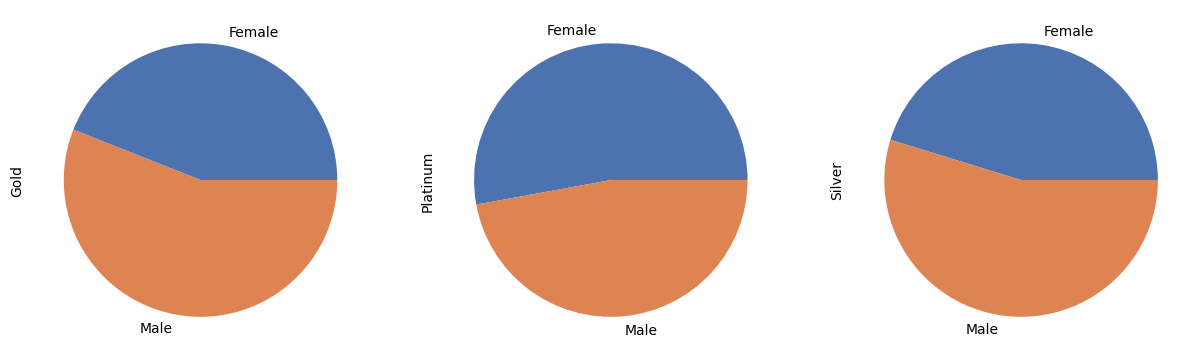

In [67]:
graph.T.plot(kind = "pie" , subplots = True , legend = False ,figsize = (15,8))
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [68]:
issues = claims_final[claims_final["incident_cause"].str.lower().str.contains("driver")].groupby("gender").size().reset_index(name = "Issues Gender Count")

In [69]:
issues

,gender,Issues Gender Count
0,Female,222
1,Male,284


<Axes: xlabel='gender', ylabel='Issues Gender Count'>

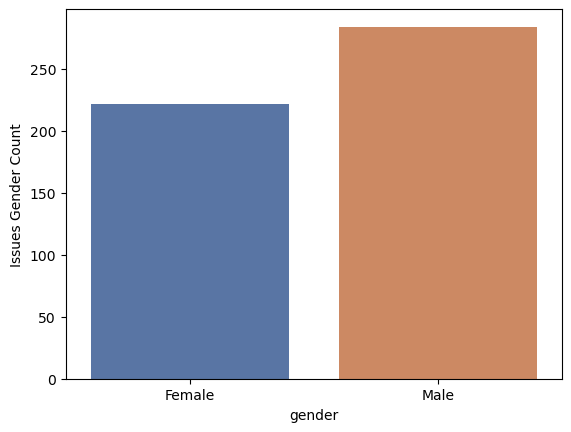

In [70]:
sns.barplot(x="gender",y="Issues Gender Count",data=issues)

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [71]:
data1= claims_final.groupby("Age_Group")[["fraudulent"]].count().reset_index()

In [72]:
data1

,Age_Group,fraudulent
0,Children,7
1,Youth,328
2,Adult,750
3,Senior,0


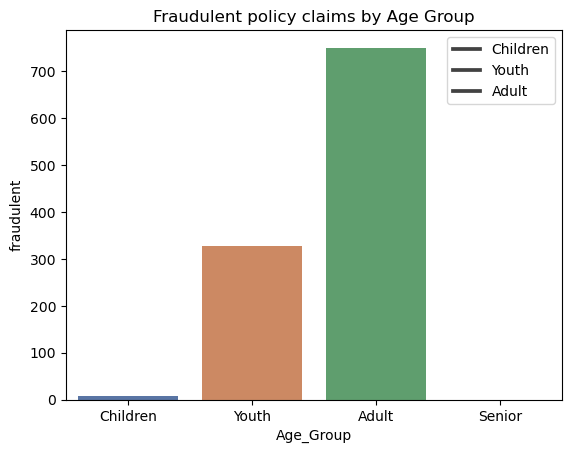

In [73]:
sns.barplot(x= "Age_Group",y = "fraudulent", data = data1)
plt.legend(["Children","Youth","Adult"])
plt.title("Fraudulent policy claims by Age Group")
plt.show()

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [74]:
claims_final.groupby("CUST_ID")[("claim_amount")].sum().reset_index()

,CUST_ID,claim_amount
0,154557.0,12442.125977
1,263204.0,39192.000000
2,287476.0,1621.500000
3,441097.0,37040.000000
4,524545.0,35250.000000
...,...,...
1080,99674324.0,21480.000000
1081,99723844.0,14360.000000
1082,99761663.0,1242.000000
1083,99892000.0,2415.000000


In [75]:
monthly_claims= pd.DataFrame(claims_final.groupby(claims_final["claim_date"].dt.month).claim_amount.sum().reset_index())

In [76]:
monthly_claims

,claim_date,claim_amount
0,1.0,1331813.375
1,2.0,1193378.500
2,3.0,1348302.125
3,4.0,1293834.750
4,5.0,1115014.500
5,6.0,1320222.250
6,7.0,1382469.625
7,8.0,913406.875
8,9.0,982604.250
9,10.0,1453690.000


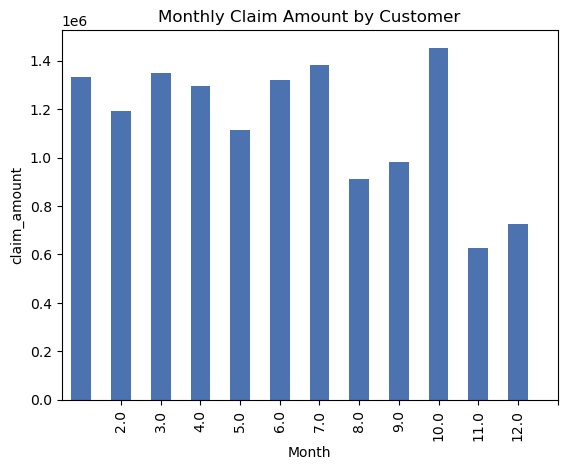

In [77]:
monthly_claims.groupby("claim_date")["claim_amount"].sum().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("claim_amount")
plt.title("Monthly Claim Amount by Customer")
plt.xticks(np.arange(1,13))
plt.show()

In [78]:
claims_final


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,38.90,Adult
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,48.75,Adult
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0,33.92,Adult
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0,34.09,Adult
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0,32.15,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0.0,NaN,NaN
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0.0,NaN,NaN
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0.0,NaN,NaN
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,0.0,NaN,NaN


### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [79]:
avg_claims=claims_final.groupby(["gender","Age_Group","fraudulent"])["claim_amount"].mean().reset_index()

In [80]:
avg_claims

,gender,Age_Group,fraudulent,claim_amount
0,Female,Children,No,11210.000000
1,Female,Children,Yes,NaN
2,Female,Youth,No,12299.540039
3,Female,Youth,Yes,7595.972168
4,Female,Adult,No,12413.455078
5,Female,Adult,Yes,12460.191406
6,Female,Senior,No,NaN
7,Female,Senior,Yes,NaN
8,Male,Children,No,22615.000000
9,Male,Children,Yes,32407.000000


AttributeError: 'DataFrame' object has no attribute 'map'

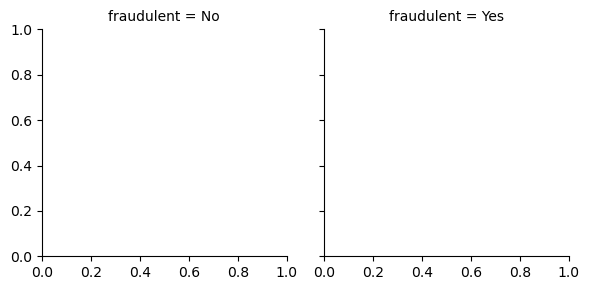

In [81]:
fig = sns.FacetGrid(data=avg_claims, col= "fraudulent")
sns.set_palette("deep")
hue_order = ["Adult","Children","Youth"]
avg_claims.map(sns.barplot,"gender","claim_amount","Age_Group",hue_order=hue_order)
plt.ticklabel_format(style = "plain",axis = "y")
plt.show()

In [ ]:
fig = sns.FacetGrid(data=avg_claims, col="fraudulent")
fig.map(sns.barplot, "gender", "claim_amount", "Age_Group", palette="deep", order=["Adult", "Children", "Youth"], hue_order=["Adult", "Children", "Youth"])
fig.add_legend(title="Age_Group")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

In [ ]:
grid = sns.FacetGrid(data=avg_claims, col="fraudulent", hue_order=["Adult", "Children", "Youth"])

# Map sns.barplot to each facet,for color 
grid.map(sns.barplot, "gender", "claim_amount", "Age_Group", palette="deep")

# Adding legend and format y-axis tick labels
grid.add_legend()
plt.ticklabel_format(style="plain", axis="y")

# Adjust spacing and layout 
plt.tight_layout()
plt.show()

# Hypothesis Tests

### 16. Is there any similarity in the amount claimed by males and females?

In [ ]:

male_claims=claims_final.loc[claims_final.gender == "Male","claim_amount"]

female_claims = claims_final.loc[claims_final.gender == "Female","claim_amount"]

In [ ]:
print("Male amount Mean = ",male_claims.mean())
print("Female amount Mean = ",female_claims.mean())

In [ ]:
t_test,p_value = stats.ttest_ind(male_claims, female_claims)
print("t_test = ",t_test)
print("p_value = ",p_value)

In [ ]:
t_test,p_value = stats.ttest_ind(male_claims, female_claims)
if p_value < 0.05:
    print("There is Significant Difference")
else:
    print("There is no Significant Difference")

### 17. Is there any relationship between age category and segment?

In [ ]:
rel= claims_final.pivot_table(index = "Segment", columns= "Age_Group", aggfunc= len, fill_value= 0)

In [ ]:
rel = pd.crosstab(claims_final.Segment,claims_final.Age_Group)

In [ ]:
rel

In [82]:
stats.chi2_contingency(rel)

NameError: name 'rel' is not defined

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [87]:
claims_final['claim_date'] = pd.to_datetime(claims_final['claim_date'])

In [88]:
claims_final.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,38.90,Adult
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0,48.75,Adult
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0,33.92,Adult
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0,34.09,Adult
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0,32.15,Adult


In [106]:
rise =  claims_final[(claims_final.claim_date>'2017-01-01') & (claims_final.claim_date<'2018-01-01')]

In [107]:
rise

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_Group
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0,38.90,Adult
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0.0,30.97,Adult
8,21831191.0,Male,1977-05-17,NH,4.197129e+09,Gold,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,0.0,40.41,Adult
13,33507197.0,Female,1966-09-09,RI,1.655195e+09,Gold,63246959.0,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,0.0,50.90,Adult
15,51583214.0,Male,1999-10-31,NH,7.434865e+09,Platinum,28564401.0,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.0,1.0,No,0.0,18.12,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,NaN,NaN,NaT,NaN,NaN,NaN,56626640.0,Other driver error,2017-08-24,Auto,Unknown,Material only,2288.5,1.0,Yes,0.0,NaN,NaN
1098,NaN,NaN,NaT,NaN,NaN,NaN,7280558.0,Crime,2017-10-17,Auto,No,Material only,3346.5,3.0,Yes,0.0,NaN,NaN
1101,NaN,NaN,NaT,NaN,NaN,NaN,33194240.0,Other causes,2017-11-13,Auto,Yes,Material and injury,24850.0,1.0,No,1.0,NaN,NaN
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0.0,NaN,NaN


In [108]:
rise.dropna(subset=['claim_amount'], inplace=True)  
print("Claim Amount Average:", round(rise['claim_amount'].mean(), 2))

Claim Amount Average: 12188.44


C:\Users\MANMOHAN\AppData\Local\Temp\ipykernel_15356\3489771357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rise.dropna(subset=['claim_amount'], inplace=True)


In [111]:
#Hypothesis Testing
stats.ttest_1samp(rise.claim_amount,10000)

TtestResult(statistic=4.010553736254916, pvalue=6.831616166351739e-05, df=593)

## 19. Is there any difference between age groups and insurance claims?

In [116]:
claims_final.Age_Group.unique()

['Adult', 'Youth', 'Children', NaN]
Categories (4, object): ['Children' < 'Youth' < 'Adult' < 'Senior']

In [120]:
adults= claims_final.loc[claims_final.Age_Group == "Age_Group","claim_amount"]
youths= claims_final.loc[claims_final.Age_Group == "Age_Group","claim_amount"]
childrens = claims_final.loc[claims_final.Age_Group == "Age_Group","claim_amount"]

In [123]:
adults,youths,childrens.mean()

(Series([], Name: claim_amount, dtype: float32),
 Series([], Name: claim_amount, dtype: float32),
 nan)

In [124]:
print('Mean of Adult Claimed Amount : ',adults.mean(),'| Mean of Youth Claimed Amount: ',youths.mean() ,
      '| Mean of Children Claimed Amount: ',childrens.mean())

Mean of Adult Claimed Amount :  nan | Mean of Youth Claimed Amount:  nan | Mean of Children Claimed Amount:  nan


In [125]:
stats.f_oneway(adults,youths,childrens)

C:\Users\MANMOHAN\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [126]:
stats.pearsonr(claims_final.total_policy_claims, claims_final.claim_amount)

PearsonRResult(statistic=-0.01998139360792278, pvalue=0.506608169736574)